# Deep learning on MNIST

This tutorial demonstrates how to build a simple [feedforward neural network](https://en.wikipedia.org/wiki/Feedforward_neural_network) (with one hidden layer) and train it from scratch with NumPy to recognize handwritten digit images.

Your deep learning model — one of the most basic artificial neural networks that resembles the original [multi-layer perceptron](https://en.wikipedia.org/wiki/Multilayer_perceptron) — will learn to classify digits from 0 to 9 from the [MNIST](https://en.wikipedia.org/wiki/MNIST_database) dataset. The dataset contains 60,000 training and 10,000 test images and corresponding labels. Each training and test image is of size 784 (or 28x28 pixels) — this will be your input for the neural network.

Based on the image inputs and their labels ([supervised learning](https://en.wikipedia.org/wiki/Supervised_learning)), your neural network will be trained to learn their features using forward propagation and backpropagation ([reverse-mode](https://en.wikipedia.org/wiki/Automatic_differentiation#Reverse_accumulation) differentiation). The final output of the network is a vector of 10 scores — one for each handwritten digit image. You will also evaluate how good your model is at classifying the images on the test set.

![Diagram showing operations detailed in this tutorial (The input image
is passed into a Hidden layer that creates a weighted sum of outputs.
The weighted sum is passed to the Non-linearity, then regularization and
into the output layer. The output layer creates a prediction which can
then be compared to existing data. The errors are used to calculate the
loss function and update weights in the hidden layer and output
layer.)](_static/tutorial-deep-learning-on-mnist.png)

This tutorial was adapted from the work by [Andrew Trask](https://github.com/iamtrask/Grokking-Deep-Learning) (with the author's permission).

## Prerequisites

The reader should have some knowledge of Python, NumPy array manipulation, and linear algebra. In addition, you should be familiar with main concepts of [deep learning](https://en.wikipedia.org/wiki/Deep_learning).

To refresh the memory, you can take the [Python](https://docs.python.org/dev/tutorial/index.html) and [Linear algebra on n-dimensional arrays](https://numpy.org/doc/stable/user/tutorial-svd.html) tutorials.

You are advised to read the [Deep learning](http://www.cs.toronto.edu/~hinton/absps/NatureDeepReview.pdf) paper published in 2015 by Yann LeCun, Yoshua Bengio, and Geoffrey Hinton, who are regarded as some of the pioneers of the field. You should also consider reading Andrew Trask's [Grokking Deep Learning](https://www.manning.com/books/grokking-deep-learning), which teaches deep learning with NumPy.

In addition to NumPy, you will be utilizing the following Python standard modules for data loading and processing:
- [`urllib`](https://docs.python.org/3/library/urllib.html) for URL handling
- [`request`](https://docs.python.org/3/library/urllib.request.html) for URL opening
- [`gzip`](https://docs.python.org/3/library/gzip.html) for gzip file decompression
- [`pickle`](https://docs.python.org/3/library/pickle.html) to work with the pickle file format

    as well as:
- [Matplotlib](https://matplotlib.org/) for data visualization

This tutorial can be run locally in an isolated environment, such as [Virtualenv](https://virtualenv.pypa.io/en/stable/) or [conda](https://docs.conda.io/projects/conda/en/latest/user-guide/tasks/manage-environments.html). You can use [Jupyter Notebook or JupyterLab](https://jupyter.org/install) to run each notebook cell. Don't forget to [set up NumPy](https://numpy.org/doc/stable/user/absolute_beginners.html#installing-numpy) and [Matplotlib](https://matplotlib.org/users/installing.html#installing-an-official-release).

## Table of contents

1. Load the MNIST dataset

2. Preprocess the dataset

3. Build and train a small neural network from scratch

4. Next steps

---

## 1. Load the MNIST dataset

In this section, you will download the zipped MNIST dataset files originally stored in [Yann LeCun's website](http://yann.lecun.com/exdb/mnist/). Then, you will transform them into 4 files of NumPy array type using built-in Python modules. Finally, you will split the arrays into training and test sets.

**1.** Define a variable to store the training/test image/label names of the MNIST dataset in a list:


1. MNIST 데이터셋 불러오기

이 섹션에서는 Yann LeCun의 웹사이트에 원래 저장되어 있던 압축된 MNIST 데이터셋 파일을 다운로드합니다. 그런 다음, Python의 내장 모듈을 사용하여 이 데이터를 4개의 NumPy 배열 형식으로 변환합니다. 마지막으로, 배열을 훈련 세트와 테스트 세트로 나누는 작업을 진행합니다.

1. MNIST 데이터셋의 훈련/테스트 이미지 및 라벨 파일 이름을 저장할 변수를 리스트에 정의하세요:

이 문장은 MNIST 데이터셋에서 훈련 및 테스트 이미지와 라벨의 파일 이름을 저장할 변수를 리스트로 정의하라는 지시사항입니다.

이미지 파일: 이미지 데이터를 포함하는 파일.
라벨 파일: 각 이미지에 대한 실제 숫자(0~9)를 포함하는 파일.

In [76]:
data_sources = {
    "training_images": "train-images-idx3-ubyte.gz",  # 60,000 training images.
    "test_images": "t10k-images-idx3-ubyte.gz",  # 10,000 test images.
    "training_labels": "train-labels-idx1-ubyte.gz",  # 60,000 training labels.
    "test_labels": "t10k-labels-idx1-ubyte.gz",  # 10,000 test labels.
}

**2.** Load the data. First check if the data is stored locally; if not, then
download it.

In [79]:
# Use responsibly! When running notebooks locally, be sure to keep local
# copies of the datasets to prevent unnecessary server requests
headers = {
    "User-Agent": "Mozilla/5.0 (X11; Linux x86_64; rv:10.0) Gecko/20100101 Firefox/10.0"
}
request_opts = {
    "headers": headers,
    "params": {"raw": "true"},
}

In [81]:
import requests
import os
import matplotlib.pyplot as plt

data_dir = "data"
os.makedirs(data_dir, exist_ok=True)

base_url = "https://github.com/rossbar/numpy-tutorial-data-mirror/blob/main/"

for fname in data_sources.values():
    fpath = os.path.join(data_dir, fname)
    if not os.path.exists(fpath):
        print("Downloading file: " + fname)
        resp = requests.get(base_url + fname, stream=True, **request_opts)
        resp.raise_for_status()  # Ensure download was succesful
        with open(fpath, "wb") as fh:
            for chunk in resp.iter_content(chunk_size=128):
                fh.write(chunk)

import requests
requests 라이브러리는 HTTP 요청을 보내는 데 사용
웹 서버에서 데이터를 가져오거나 API와 상호작용할 때 자주 사용

import os
os 모듈은 운영체제와 상호작용하는 기능을 제공 
파일 경로나 디렉토리 관련 작업에 사용

data_dir = "data":
data_dir 변수는 데이터를 저장할 디렉토리 이름을 정의 

os.makedirs(data_dir, exist_ok=True):
os.makedirs()는 지정된 경로에 디렉토리를 생성

exist_ok=True는 만약 해당 디렉토리가 이미 존재할 경우 
오류를 발생시키지 않고 넘어가게 하는 옵션

base_url = "https://github.com/rossbar/numpy-tutorial-data-mirror/blob/main/":
base_url 변수는 파일들이 위치한 서버의 기본 URL을 정의
각 파일은 이 기본 URL을 기준으로 다운로드되며, 파일 이름만 붙여서 전체 URL을 생성합니다.

for fname in data_sources.values()::
data_sources는 이전에 정의된 파일 이름을 저장한 딕셔너리 또는 데이터 구조로 예상
.values()는 data_sources의 값(파일 이름)을 순회

fpath = os.path.join(data_dir, fname):
fpath는 로컬 파일 경로를 생성합니다.
os.path.join(data_dir, fname)는 "data" 디렉토리와 파일 이름(fname)을 합쳐서 로컬 시스템에서의 파일 경로를 만듭니다. 예를 들어 "data/myfile.csv"와 같은 경로가 생성될 수 있습니다.

if not os.path.exists(fpath)::
이 조건은 파일이 이미 존재하는지 확인합니다. 만약 파일이 이미 존재하면 다운로드를 하지 않고 넘어갑니다.
즉, 파일이 없을 때만 다운로드합니다.

resp = requests.get(base_url + fname, stream=True, **request_opts):

requests.get()는 HTTP GET 요청을 통해 서버에서 파일을 가져옵니다.
base_url + fname는 파일을 다운로드할 전체 URL을 생성합니다. 즉, 기본 URL에 파일 이름을 붙여 전체 파일 경로를 만듭니다.

stream=True는 파일을 스트리밍 방식으로 다운로드한다는 의미입니다. 즉, 파일을 한꺼번에 메모리에 모두 로드하지 않고, 작은 청크(chunk) 단위로 다운로드

**request_opts는 이전에 정의된 **옵션 설정(헤더와 쿼리 매개변수)**을 사용합니다.
resp.raise_for_status():

다운로드가 정상적으로 이루어졌는지 확인하는 함수입니다.
서버에서 문제가 발생하거나 파일을 찾을 수 없을 때 **예외(에러)**를 발생시킵니다. 예를 들어, HTTP 404 에러가 발생할 경우 이 코드에서 예외가 발생합니다.
with open(fpath, "wb") as fh::

파일을 쓰기 모드로 열고("wb"는 바이너리 쓰기 모드), 파일 객체 fh에 데이터를 기록합니다.
"wb" 모드는 바이너리 데이터(이미지, 압축 파일 등)를 저장할 때 사용됩니다.
for chunk in resp.iter_content(chunk_size=128)::

스트리밍 방식으로 데이터를 다운로드할 때 128바이트 크기의 청크 단위로 데이터를 읽어옵니다.
resp.iter_content()는 스트리밍 방식으로 서버에서 데이터를 가져오는 메서드입니다.
fh.write(chunk):

각 청크를 파일에 쓰기 작업을 합니다.
파일에 128바이트씩 데이터를 계속해서 기록하여 다운로드가 완료될 때까지 반복

**3.** Decompress the 4 files and create 4 [`ndarrays`](https://numpy.org/doc/stable/reference/arrays.ndarray.html), saving them into a dictionary. Each original image is of size 28x28 and neural networks normally expect a 1D vector input; therefore, you also need to reshape the images by multiplying 28 by 28 (784).

In [85]:
import gzip
import numpy as np

mnist_dataset = {}

# Images
for key in ("training_images", "test_images"):
    with gzip.open(os.path.join(data_dir, data_sources[key]), "rb") as mnist_file:
        mnist_dataset[key] = np.frombuffer(
            mnist_file.read(), np.uint8, offset=16
        ).reshape(-1, 28 * 28)
"""
for key in ("training_images", "test_images")::

training_images와 test_images라는 두 개의 키에 대해 반복문을 실행합니다. 각각 훈련 이미지와 테스트 이미지를 처리합니다.
with gzip.open(os.path.join(data_dir, data_sources[key]), "rb") as mnist_file::

gzip.open()은 MNIST 데이터 파일을 압축 해제하여 읽는 작업입니다.
os.path.join(data_dir, data_sources[key])는 파일 경로를 생성합니다. data_dir는 데이터가 저장된 디렉토리이고, data_sources[key]는 training_images 또는 test_images의 파일 이름을 의미합니다.
"rb"는 바이너리 읽기 모드를 뜻합니다.
np.frombuffer(mnist_file.read(), np.uint8, offset=16):

mnist_file.read()는 파일에서 데이터를 읽어서 바이트 형태로 반환합니다.
**np.frombuffer()**는 바이트 데이터를 numpy 배열로 변환합니다. np.uint8은 8비트(0~255) 범위의 부호 없는 정수로 변환하겠다는 뜻입니다.
offset=16: MNIST 이미지 파일의 헤더에는 16바이트의 메타데이터(이미지 개수, 행과 열의 수 등)가 있기 때문에, 이를 건너뛰고(16바이트를 무시하고) 나머지 데이터를 이미지 데이터로 처리합니다.
.reshape(-1, 28 * 28):

읽은 데이터를 28x28 픽셀 이미지로 변환합니다.
-1은 데이터 개수에 맞춰서 자동으로 행을 맞추겠다는 의미입니다. 즉, 전체 데이터셋에서 각 이미지가 28x28 크기의 이미지로 변환됩니다.
결과적으로 각 이미지는 28x28 픽셀로 구성된 784개의 픽셀 값을 가지며, 이를 1차원 배열(784개의 값)로 변환한 것입니다.
"""
# Labels
for key in ("training_labels", "test_labels"):
    with gzip.open(os.path.join(data_dir, data_sources[key]), "rb") as mnist_file:
        mnist_dataset[key] = np.frombuffer(mnist_file.read(), np.uint8, offset=8)

"""
for key in ("training_labels", "test_labels")::

훈련 라벨과 테스트 라벨을 처리합니다.
gzip.open():

이미지 처리와 동일하게, 압축된 파일을 해제하여 읽습니다.
np.frombuffer(mnist_file.read(), np.uint8, offset=8):

라벨 파일의 헤더는 8바이트이므로, **offset=8**을 사용하여 이를 무시한 후 라벨 데이터를 읽습니다.
라벨은 0~9 사이의 정수로 표현되며, 각 이미지에 대한 숫자 값을 의미합니다.
4. 최종 딕셔너리 mnist_dataset:
mnist_dataset 딕셔너리는 이제 네 개의 주요 데이터셋을 포함하게 됩니다:
'training_images': 훈련 이미지 (28x28 픽셀의 이미지가 펼쳐진 1차원 배열 형태).
'test_images': 테스트 이미지.
'training_labels': 훈련 라벨 (각 이미지가 어떤 숫자를 나타내는지).
'test_labels': 테스트 라벨.
"""

'\nfor key in ("training_labels", "test_labels")::\n\n훈련 라벨과 테스트 라벨을 처리합니다.\ngzip.open():\n\n이미지 처리와 동일하게, 압축된 파일을 해제하여 읽습니다.\nnp.frombuffer(mnist_file.read(), np.uint8, offset=8):\n\n라벨 파일의 헤더는 8바이트이므로, **offset=8**을 사용하여 이를 무시한 후 라벨 데이터를 읽습니다.\n라벨은 0~9 사이의 정수로 표현되며, 각 이미지에 대한 숫자 값을 의미합니다.\n4. 최종 딕셔너리 mnist_dataset:\nmnist_dataset 딕셔너리는 이제 네 개의 주요 데이터셋을 포함하게 됩니다:\n\'training_images\': 훈련 이미지 (28x28 픽셀의 이미지가 펼쳐진 1차원 배열 형태).\n\'test_images\': 테스트 이미지.\n\'training_labels\': 훈련 라벨 (각 이미지가 어떤 숫자를 나타내는지).\n\'test_labels\': 테스트 라벨.\n'

In [87]:
mnist_dataset

{'training_images': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'test_images': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'training_labels': array([5, 0, 4, ..., 5, 6, 8], dtype=uint8),
 'test_labels': array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)}

**4.** Split the data into training and test sets using the standard notation of `x` for data and `y` for labels, calling the training and test set images `x_train` and `x_test`, and the labels `y_train` and `y_test`:

In [90]:
x_train, y_train, x_test, y_test = (
    mnist_dataset["training_images"],
    mnist_dataset["training_labels"],
    mnist_dataset["test_images"],
    mnist_dataset["test_labels"],
)

#print(x_train)
print(x_train.shape)
print(y_train.shape)

(60000, 784)
(60000,)


In [92]:
x_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

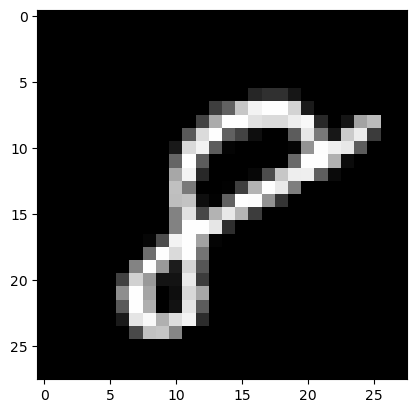

In [94]:
x_train[0].reshape(28, 28) # 정방 행렬
data = x_train[-1].reshape(28, 28)
# 1차원 배열을 28x28 크기의 2차원 배열로 변환합니다. 이렇게 하면, 이미지 데이터를 정방 행렬로 표현할 수 있습니다
plt.imshow(data, cmap='gray')

In [96]:
y_train[0]  #정답 데이터와 비교 확인 
y_train[-1] #정답 데이터와 비교 확인 
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

**5.** You can confirm that the shape of the image arrays is `(60000, 784)` and `(10000, 784)` for training and test sets, respectively, and the labels — `(60000,)` and `(10000,)`:

In [99]:
print(
    "The shape of training images: {} and training labels: {}".format(
        x_train.shape, y_train.shape
    )
)
print(
    "The shape of test images: {} and test labels: {}".format(
        x_test.shape, y_test.shape
    )
)

The shape of training images: (60000, 784) and training labels: (60000,)
The shape of test images: (10000, 784) and test labels: (10000,)


**6.** And you can inspect some images using Matplotlib:

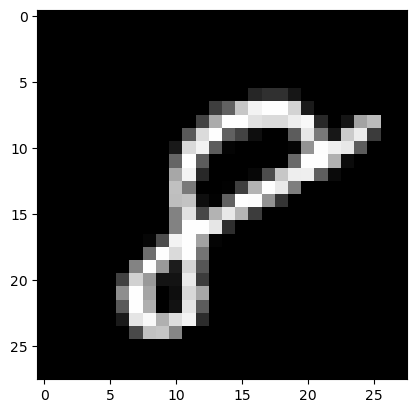

In [102]:
import matplotlib.pyplot as plt

# Take the 60,000th image (indexed at 59,999) from the training set,
# reshape from (784, ) to (28, 28) to have a valid shape for displaying purposes.
mnist_image = x_train[59999, :].reshape(28, 28)
# Set the color mapping to grayscale to have a black background.
plt.imshow(mnist_image, cmap="gray")
# Display the image.
plt.show()

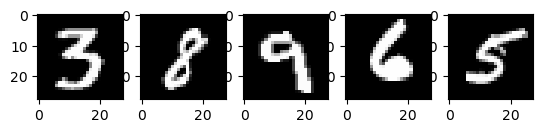

In [104]:
# Display 5 random images from the training set.
num_examples = 5
seed = 147197952744 #재현 가능한 무작위 선택을 가능
rng = np.random.default_rng(seed) # 난수 생성기

fig, axes = plt.subplots(1, num_examples)
"""
**rng.choice()**는 난수 생성기를 사용하여 주어진 배열(x_train)에서 무작위로 샘플을 선택하는 함수입니다.
x_train: MNIST 데이터셋의 훈련 이미지입니다.
size=num_examples: 5개의 이미지를 선택합니다.
replace=False: 중복 없이 무작위로 이미지를 선택합니다. 즉, 같은 이미지가 여러 번 선택되지 않습니다.
"""
for sample, ax in zip(rng.choice(x_train, size=num_examples, replace=False), axes):
    ax.imshow(sample.reshape(28, 28), cmap="gray")

_Above are five images taken from the MNIST training set. Various hand-drawn
Arabic numerals are shown, with exact values chosen randomly with each run of the code._

> **Note:** You can also visualize a sample image as an array by printing `x_train[59999]`. Here, `59999` is your 60,000th training image sample (`0` would be your first). Your output will be quite long and should contain an array of 8-bit integers:
>
>
> ```
> ...
>          0,   0,  38,  48,  48,  22,   0,   0,   0,   0,   0,   0,   0,
>          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
>          0,  62,  97, 198, 243, 254, 254, 212,  27,   0,   0,   0,   0,
> ...
> ```

In [107]:
# Display the label of the 60,000th image (indexed at 59,999) from the training set.
y_train[59999]

8

## 2. Preprocess the data

Neural networks can work with inputs that are in a form of tensors (multidimensional arrays) of floating-point type. When preprocessing the data, you should consider the following processes: [vectorization](https://en.wikipedia.org/wiki/Vectorization_%28mathematics%29) and [conversion to a floating-point format](https://en.wikipedia.org/wiki/Floating-point_arithmetic#Floating-point_numbers).

Since the MNIST data is already vectorized and the arrays are of `dtype` `uint8`, your next challenge is to convert them to a floating-point format, such as `float64` ([double-precision](https://en.wikipedia.org/wiki/Double-precision_floating-point_format)):

- _Normalizing_ the image data: a [feature scaling](https://en.wikipedia.org/wiki/Feature_scaling#Application) procedure that can speed up the neural network training process by standardizing the [distribution of your input data](https://arxiv.org/pdf/1502.03167.pdf).
- _[One-hot/categorical encoding](https://en.wikipedia.org/wiki/One-hot)_ of the image labels.

In practice, you can use different types of floating-point precision depending on your goals and you can find more information about that in the [Nvidia](https://blogs.nvidia.com/blog/2019/11/15/whats-the-difference-between-single-double-multi-and-mixed-precision-computing/) and [Google Cloud](https://cloud.google.com/blog/products/ai-machine-learning/bfloat16-the-secret-to-high-performance-on-cloud-tpus) blog posts.

### Convert the image data to the floating-point format

The images data contain 8-bit integers encoded in the [0, 255] interval with color values between 0 and 255.

You will normalize them into floating-point arrays in the [0, 1] interval by dividing them by 255.

**1.** Check that the vectorized image data has type `uint8`:

### 데이터 벡터화 및 부동소수점 형식으로 변환:

벡터화란 이미지를 1차원 배열로 변환하는 것을 의미합니다. 다행히, MNIST 데이터는 이미 벡터화된 상태로 제공되기 때문에 추가 벡터화가 필요하지 않습니다.
부동소수점 형식으로 변환해야 하는 이유는, 신경망은 실수 값(예: float32, float64)으로 연산을 처리하기 때문입니다. 이 과정에서는 데이터를 uint8(부호 없는 8비트 정수)에서 부동소수점 실수(float)로 변환해야 합니다.

### 데이터 정규화(Normalization):

MNIST 이미지 데이터는 0에서 255 사이의 정수 값으로 구성되어 있습니다. 이는 픽셀의 밝기를 나타내며, 흑백 이미지에서 0은 검은색이고 255는 흰색을 의미합니다.
정규화는 데이터를 0에서 1 사이의 값으로 변환하는 과정입니다. 이를 통해 신경망 학습 속도를 개선하고, 다양한 특성 간의 차이를 줄여 모델이 더 잘 학습할 수 있도록 도와줍니다.
정규화를 위해서는 255로 나누어서 각 픽셀 값을 0~1 사이의 값으로 변환해야 합니다.

### 원-핫 인코딩(One-hot encoding):

MNIST 데이터셋의 레이블(숫자 0부터 9까지)은 정수 값으로 되어 있습니다. 신경망 모델은 이 레이블을 원-핫 인코딩 형식으로 변환해야 합니다. 원-핫 인코딩은 하나의 정수 레이블을 0과 1로 이루어진 벡터로 변환하는 방식입니다.
예: 숫자 2 → [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
신경망 모델은 이 벡터 형식으로 각 숫자를 예측하게 됩니다.

In [111]:
print("The data type of training images: {}".format(x_train.dtype))
print("The data type of test images: {}".format(x_test.dtype))

The data type of training images: uint8
The data type of test images: uint8


**2.** Normalize the arrays by dividing them by 255 (and thus promoting the data type from `uint8` to `float64`) and then assign the train and test image data variables — `x_train` and `x_test` — to `training_images` and `train_labels`, respectively.
To reduce the model training and evaluation time in this example, only a subset
of the training and test images will be used.
Both `training_images` and `test_images` will contain only 1,000 samples each out
of the complete datasets of 60,000 and 10,000 images, respectively.
These values can be controlled by changing the  `training_sample` and
`test_sample` below, up to their maximum values of 60,000 and 10,000.

In [272]:
# 사용할 훈련 샘플과 테스트 샘플의 개수를 지정
training_sample, test_sample = 1000, 1000
training_images = x_train[0:training_sample] / 255
test_images = x_test[0:test_sample] / 255

**3.** Confirm that the image data has changed to the floating-point format:

In [117]:
print("The data type of training images: {}".format(training_images.dtype))
print("The data type of test images: {}".format(test_images.dtype))

The data type of training images: float64
The data type of test images: float64


> **Note:** You can also check that normalization was successful by printing `training_images[0]` in a notebook cell. Your long output should contain an array of floating-point numbers:
>
> ```
> ...
>        0.        , 0.        , 0.01176471, 0.07058824, 0.07058824,
>        0.07058824, 0.49411765, 0.53333333, 0.68627451, 0.10196078,
>        0.65098039, 1.        , 0.96862745, 0.49803922, 0.        ,
> ...
> ```

### Convert the labels to floating point through categorical/one-hot encoding

You will use one-hot encoding to embed each digit label as an all-zero vector with `np.zeros()` and place `1` for a label index. As a result, your label data will be arrays with `1.0` (or `1.`) in the position of each image label.

Since there are 10 labels (from 0 to 9) in total, your arrays will look similar to this:

```
array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])
```

**1.** Confirm that the image label data are integers with `dtype` `uint8`:

In [120]:
print("The data type of training labels: {}".format(y_train.dtype))
print("The data type of test labels: {}".format(y_test.dtype))

The data type of training labels: uint8
The data type of test labels: uint8


**2.** Define a function that performs one-hot encoding on arrays:

labels[..., None]: labels 배열의 각 값(정수 레이블)에 대해 차원을 확장합니다.
예를 들어, labels가 [2, 0, 1]이라면, 이 코드는 [[2], [0], [1]]처럼 차원을 확장합니다. 이는 나중에 브로드캐스팅을 하기 위한 준비입니다.
np.arange(dimension)[None]:

np.arange(dimension)은 [0, 1, 2, ..., dimension-1]의 배열을 만듭니다. 여기서 dimension=10이므로 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]라는 배열이 생성됩니다. [None]을 사용하여 차원을 확장합니다. 즉, [[0, 1, 2, ..., 9]] 같은 1차원 배열에서 2차원 배열로 만들어집니다.

비교 연산: labels[..., None] == np.arange(dimension)[None]:
labels의 각 요소를 np.arange(dimension)의 각 값과 비교합니다. 이 비교는 브로드캐스팅을 통해 이루어지며, 각 레이블 값과 0~9의 배열을 비교하여 해당 위치에 True 값을 반환합니다.
예를 들어, labels = [2, 0, 1]인 경우, 이 코드는 다음과 같은 결과를 생성합니다:

In [274]:
def one_hot_encoding(labels, dimension=10):
    # Define a one-hot variable for an all-zero vector
    # with 10 dimensions (number labels from 0 to 9).
    one_hot_labels = labels[..., None] == np.arange(dimension)[None]
    # Return one-hot encoded labels.
    return one_hot_labels.astype(np.float64)

**3.** Encode the labels and assign the values to new variables:

In [276]:
training_labels = one_hot_encoding(y_train[:training_sample])
test_labels = one_hot_encoding(y_test[:test_sample])

**4.** Check that the data type has changed to floating point:

In [130]:
print("The data type of training labels: {}".format(training_labels.dtype))
print("The data type of test labels: {}".format(test_labels.dtype))

The data type of training labels: float64
The data type of test labels: float64


**5.** Examine a few encoded labels:

In [133]:
print(training_labels[0])
print(training_labels[1])
print(training_labels[2])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


...and compare to the originals:

In [136]:
print(y_train[0])
print(y_train[1])
print(y_train[2])

5
0
4


You have finished preparing the dataset.

## 3. Build and train a small neural network from scratch

In this section you will familiarize yourself with some high-level concepts of the basic building blocks of a deep learning model. You can refer to the original [Deep learning](http://www.cs.toronto.edu/~hinton/absps/NatureDeepReview.pdf) research publication for more information.

Afterwards, you will construct the building blocks of a simple deep learning model in Python and NumPy and train it to learn to identify handwritten digits from the MNIST dataset with a certain level of accuracy.

### Neural network building blocks with NumPy

- _Layers_: These building blocks work as data filters — they process data and learn representations from inputs to better predict the target outputs.

    You will use 1 hidden layer in your model to pass the inputs forward (_forward propagation_) and propagate the gradients/error derivatives of a loss function backward (_backpropagation_). These are input, hidden and output layers.

    In the hidden (middle) and output (last) layers, the neural network model will compute the weighted sum of inputs. To compute this process, you will use NumPy's matrix multiplication function (the "dot multiply" or `np.dot(layer, weights)`).

    > **Note:** For simplicity, the bias term is omitted in this example (there is no `np.dot(layer, weights) + bias`).

- _Weights_: These are important adjustable parameters that the neural network fine-tunes by forward and backward propagating the data. They are optimized through a process called [gradient descent](https://en.wikipedia.org/wiki/Stochastic_gradient_descent). Before the model training starts, the weights are randomly initialized with NumPy's [`Generator.random()`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.random.html).

    The optimal weights should produce the highest prediction accuracy and the lowest error on the training and test sets.

- _Activation function_: Deep learning models are capable of determining non-linear relationships between inputs and outputs and these [non-linear functions](https://en.wikipedia.org/wiki/Activation_function) are usually applied to the output of each layer.

    You will use a [rectified linear unit (ReLU)](https://en.wikipedia.org/wiki/Rectifier_(neural_networks)) to the hidden layer's output (for example, `relu(np.dot(layer, weights))`.

- _Regularization_: This [technique](https://en.wikipedia.org/wiki/Regularization_(mathematics)) helps prevent the neural network model from [overfitting](https://en.wikipedia.org/wiki/Overfitting).

    In this example, you will use a method called dropout — [dilution](https://en.wikipedia.org/wiki/Dilution_(neural_networks)) — that randomly sets a number of features in a layer to 0s. You will define it with NumPy's [`Generator.integers()`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.integers.html) method and apply it to the hidden layer of the network.

- _Loss function_: The computation determines the quality of predictions by comparing the image labels (the truth) with the predicted values in the final layer's output.

    For simplicity, you will use a basic total squared error using NumPy's `np.sum()` function (for example, `np.sum((final_layer_output - image_labels) ** 2)`).

- _Accuracy_: This metric measures the accuracy of the network's ability to predict on the data it hasn't seen.

### Model architecture and training summary

Here is a summary of the neural network model architecture and the training process:


![Diagram showing operations detailed in this tutorial (The input image
is passed into a Hidden layer that creates a weighted sum of outputs.
The weighted sum is passed to the Non-linearity, then regularization and
into the output layer. The output layer creates a prediction which can
then be compared to existing data. The errors are used to calculate the
loss function and update weights in the hidden layer and output
layer.)](_static/tutorial-deep-learning-on-mnist.png)

- _The input layer_:

    It is the input for the network — the previously preprocessed data that is loaded from `training_images` into `layer_0`.

- _The hidden (middle) layer_:

    `layer_1` takes the output from the previous layer and performs matrix-multiplication of the input by weights (`weights_1`) with NumPy's `np.dot()`).

    Then, this output is passed through the ReLU activation function for non-linearity and then dropout is applied to help with overfitting.

- _The output (last) layer_:

    `layer_2` ingests the output from `layer_1` and repeats the same "dot multiply" process with `weights_2`.

    The final output returns 10 scores for each of the 0-9 digit labels. The network model ends with a size 10 layer — a 10-dimensional vector.

- _Forward propagation, backpropagation, training loop_:

    In the beginning of model training, your network randomly initializes the weights and feeds the input data forward through the hidden and output layers. This process is the forward pass or forward propagation.

    Then, the network propagates the "signal" from the loss function back through the hidden layer and adjusts the weights values with the help of the learning rate parameter (more on that later).

> **Note:** In more technical terms, you:
>
>    1. Measure the error by comparing the real label of an image (the truth) with the prediction of the model.
>    2. Differentiate the loss function.
>    3. Ingest the [gradients](https://en.wikipedia.org/wiki/Gradient) with the respect to the output, and backpropagate them with the respect to the inputs through the layer(s).
>
>    Since the network contains tensor operations and weight matrices, backpropagation uses the [chain rule](https://en.wikipedia.org/wiki/Chain_rule).
>
>    With each iteration (epoch) of the neural network training, this forward and backward propagation cycle adjusts the weights, which is reflected in the accuracy and error metrics. As you train the model, your goal is to minimize the error and maximize the accuracy on the training data, where the model learns from, as well as the test data, where you evaluate the model.

### Compose the model and begin training and testing it

Having covered the main deep learning concepts and the neural network architecture, let's write the code.

**1.** We'll start by creating a new random number generator, providing a seed
for reproducibility:

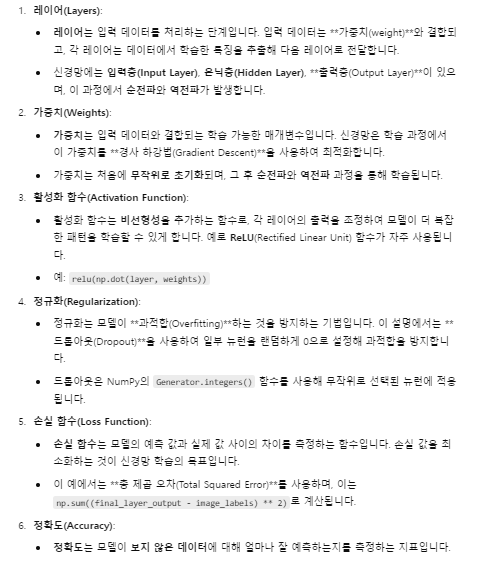

In [278]:
seed = 884736743
rng = np.random.default_rng(seed)

**2.** For the hidden layer, define the ReLU activation function for forward propagation and ReLU's derivative that will be used during backpropagation:

In [280]:
# Define ReLU that returns the input if it's positive and 0 otherwise.
def relu(x):
    return (x >= 0) * x


# Set up a derivative of the ReLU function that returns 1 for a positive input
# and 0 otherwise.
def relu2deriv(output):
    return output >= 0

[0 0 0 0 0 0 0 0 0 0 0 1 2 3 4 5 6 7 8 9]


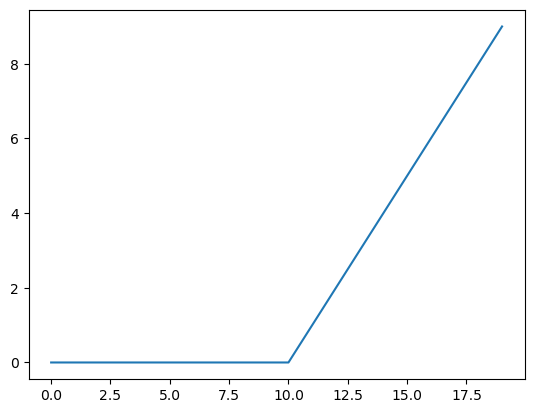

In [166]:
a = np.arange(-10, 10)
print(relu(a))
plt.plot(relu(a))

**3.** Set certain default values of [hyperparameters](https://en.wikipedia.org/wiki/Hyperparameter_(machine_learning)), such as:

- [_Learning rate_](https://en.wikipedia.org/wiki/Learning_rate): `learning_rate` — helps limit the magnitude of weight updates to prevent them from overcorrecting.
- _Epochs (iterations)_: `epochs` — the number of complete passes — forward and backward propagations — of the data through the network. This parameter can positively or negatively affect the results. The higher the iterations, the longer the learning process may take. Because this is a computationally intensive task, we have chosen a very low number of epochs (20). To get meaningful results, you should choose a much larger number.
- _Size of the hidden (middle) layer in a network_: `hidden_size` — different sizes of the hidden layer can affect the results during training and testing.
- _Size of the input:_ `pixels_per_image` — you have established that the image input is 784 (28x28) (in pixels).
- _Number of labels_: `num_labels` — indicates the output number for the output layer where the predictions occur for 10 (0 to 9) handwritten digit labels.

In [282]:
learning_rate = 0.005  # 학습률 
epochs = 20 # 학습 횟수
hidden_size = 100 # 뉴런 개수 
pixels_per_image = 784 # 이미지당 픽셀 수 
num_labels = 10 # 0~9 10개

**4.** Initialize the weight vectors that will be used in the hidden and output layers with random values:

In [149]:
weights_1 = 0.2 * rng.random((pixels_per_image, hidden_size)) - 0.1
weights_2 = 0.2 * rng.random((hidden_size, num_labels)) - 0.1

"""
크기가 (pixels_per_image, hidden_size)인 가중치 행렬을 무작위로 생성합니다. 
즉, 입력층에서 은닉층으로 가는 가중치입니다.
**weights_1**는 입력층에서 은닉층으로 가는 가중치를 무작위로 초기화한 값입니다.
**weights_2**는 은닉층에서 출력층으로 가는 가중치를 무작위로 초기화한 값입니다.
"""

In [172]:
weights_1
weights_1.shape # 은닉층 노드 수

(784, 100)

In [258]:
# i = 0
# layer_0 = training_images[i]
# layer_0

**5.** Set up the neural network's learning experiment with a training loop and start the training process.
Note that the model is evaluated against the test set at each epoch to track
its performance over the training epochs.

Start the training process:

In [206]:
training_labels[i] 
training_labels[i] - layer_2
(training_labels[i] - layer_2)**2

array([1.65220085e-03, 4.83057565e-04, 1.36993006e-05, 6.97815977e-04,
       1.17956022e-01, 9.55213609e-01, 3.96326246e-01, 1.41981064e-04,
       9.90429759e-06, 2.09474087e-03])

In [208]:
# 훈련 오차
training_loss = 0.0
training_loss += np.sum((training_labels[i] - layer_2) ** 2)
training_loss

1.4745892771135642

In [222]:
# 예측값 - np.argmax(리스트) - 가장 큰 수 반환
np.argmax(layer_2)

6

In [224]:
# 실제값
np.argmax(training_labels[i])

5

In [226]:
np.argmax(layer_2) == np.argmax(training_labels[i])

False

In [230]:
test_images.shape

(1000, 784)

In [232]:
weights_1.shape

(784, 100)

In [234]:
weights_2.shape

(100, 10)

In [228]:
results = relu(test_images @ weights_1) @ weights_2 # 행렬곱 연산

In [254]:
# np.argmax(test_labels, axis=1)

In [256]:
# np.argmax(results, axis=1)

In [252]:
# 예측값과 실제값 비교
np.argmax(results, axis=1) == np.argmax(test_labels, axis=1)
np.sum(np.argmax(results, axis=1) == np.argmax(test_labels, axis=1))
np.sum(np.argmax(results, axis=1) != np.argmax(test_labels, axis=1))
np.mean(np.argmax(results, axis=1) == np.argmax(test_labels, axis=1)) * 100

80.10000000000001

In [288]:
learning_rate = 0.005  # 학습률 
epochs = 20 # 학습 횟수
hidden_size = 100 # 뉴런 개수 
pixels_per_image = 784 # 이미지당 픽셀 수 
num_labels = 10 # 0~9 10개

In [290]:
# To store training and test set losses and accurate predictions
# for visualization.
store_training_loss = [] # 훈련 오차(손실)
store_training_accurate_pred = [] #예측 정확도 
store_test_loss = [] 
store_test_accurate_pred = []
"""
손실 및 정확도 저장 리스트:
store_training_loss: 훈련 손실을 저장합니다.
store_training_accurate_pred: 훈련 데이터에서 정확한 예측 수를 저장합니다.
store_test_loss: 테스트 손실을 저장합니다.
store_test_accurate_pred: 테스트 데이터에서 정확한 예측 수를 저장합니다.
"""


# 훈련 루프
# 정의된 에포크(반복) 횟수만큼 학습 실험을 실행
for j in range(epochs):

    #################
    # 훈련 단계 #
    #################

    # 초기 손실/오차와 정확한 예측 수를 0으로 설정합니다.
    training_loss = 0.0
    training_accurate_predictions = 0

    # 훈련 세트의 모든 이미지에 대해 순전파를 수행하고
    # 역전파를 통해 가중치를 조정합니다.
    for i in range(len(training_images)):
        # 순전파:
        # 1. 입력층:
        #    훈련 이미지 데이터를 입력으로 초기화합니다.
        layer_0 = training_images[i] 
        # 2. 은닉층:
        #    훈련 이미지 데이터를 은닉층에 전달하며, 
        #    가중치와 행렬 곱셈을 통해 계산합니다.
        layer_1 = np.dot(layer_0, weights_1)
        # 3. 은닉층의 출력을 ReLU 활성화 함수에 통과시킵니다.
        layer_1 = relu(layer_1)
        # 4. 정규화를 위해 드롭아웃 함수를 정의합니다.
        dropout_mask = rng.integers(low=0, high=2, size=layer_1.shape)
        # 5. 은닉층의 출력에 드롭아웃을 적용합니다.
        layer_1 *= dropout_mask * 2
        # 6. 출력층:
        #    은닉층의 출력을 최종 출력층에 전달하며
        #    가중치와 행렬 곱셈을 수행합니다.
        #    10개의 스코어를 가진 10차원 벡터를 생성합니다.
        layer_2 = np.dot(layer_1, weights_2)

        """
        역전파 과정:
        layer_2_delta: 출력층의 오차를 계산합니다. 이 오차는 출력 값과 실제 값의 차이입니다.
        layer_1_delta: 은닉층에서의 오차를 계산하여 역전파합니다. 여기서 ReLU의 도함수(relu2deriv())를 사용하여 오차를 은닉층으로 전파합니다.
        가중치 업데이트: **weights_1**과 **weights_2**는 학습률과 각 레이어의 오차(layer_1_delta, layer_2_delta)에 따라 업데이트됩니다.
        """
        # 역전파:
        # 1. 실제 이미지 레이블(정답)과 모델의 예측 값 간의
        #    손실 함수(오차)를 측정합니다.
      
        training_loss += np.sum((training_labels[i] - layer_2) ** 2)  # 실제 레이블(training_labels[i]) 간의 차이를 계산, 제곱을 합산하는 방식으로 손실
        # 2. 정확한 예측 수를 증가시킵니다.
        
        training_accurate_predictions += int(
            np.argmax(layer_2) == np.argmax(training_labels[i]) #즉, 모델이 훈련 데이터에서 올바르게 예측한 샘플 수를 기록
            #*np.argmax(layer_2)**는 이 벡터에서 가장 큰 값의 인덱스(즉, 가장 높은 확률을 가지는 숫자)를 반환
        )
        # 3. 손실 함수/오차를 미분합니다.
        layer_2_delta = training_labels[i] - layer_2 # 출력층에서의 오차를 계산하는 단계로, 모델의 예측 값과 실제 레이블의 차이
        # 4. 손실 함수의 기울기를 은닉층을 통해 역전파합니다.
        layer_1_delta = np.dot(weights_2, layer_2_delta) * relu2deriv(layer_1) #출력층의 오차(delta)를 은닉층으로 전파, relu2deriv(layer_1)는 은닉층에서 사용된 ReLU 함수의 도함수
        # ReLU 함수의 도함수와 출력층에서 전파된 오차를 곱하여 은닉층에서의 최종 오차(layer_1_delta)를 계산
        # 5. 드롭아웃을 기울기에 적용합니다.
        layer_1_delta *= dropout_mask
        # **dropout_mask**는 은닉층에 드롭아웃을 적용하기 위해 사용되는 마스크(mask) -> 0과 1로 이루어진 배열로, 은닉층의 각 뉴런에 대해 해당 뉴런이 활성화 여부를 나타냅니다.
        # 6. 은닉층 및 입력층의 가중치를
        #    학습률과 기울기 값을 곱하여 업데이트합니다.
        weights_1 += learning_rate * np.outer(layer_0, layer_1_delta)
        weights_2 += learning_rate * np.outer(layer_1, layer_2_delta)

    # 훈련 세트 손실 및 정확한 예측을 저장합니다.
    store_training_loss.append(training_loss)
    store_training_accurate_pred.append(training_accurate_predictions)

    ###################
    # 평가 단계 #
    ###################

    # 각 에포크마다 테스트 세트에서 모델 성능을 평가합니다.

    # 훈련 단계와 달리, 테스트 단계에서는 각 이미지마다
    # (또는 배치마다) 가중치가 수정되지 않습니다. 따라서 테스트 이미지에
    # 모델을 적용할 때 개별 이미지를 순회할 필요 없이
    # 벡터화된 방식으로 처리할 수 있습니다.

    results = relu(test_images @ weights_1) @ weights_2
    """
    # 가정: 1,000개의 테스트 이미지, 은닉층에 128개의 뉴런이 있음
    test_images.shape = (1000, 784)  # 1,000개의 이미지, 각 이미지가 784개의 픽셀로 표현됨
    weights_1.shape = (784, 128)     # 입력층과 은닉층을 연결하는 가중치
    weights_2.shape = (128, 10)      # 은닉층과 출력층을 연결하는 가중치
    
    # 순전파 예측:
    results = relu(test_images @ weights_1) @ weights_2
    # 결과: (1000, 10) 크기의 행렬, 각 테스트 이미지에 대해 10개의 예측 점수가 나옴
    """
    # 실제 레이블(정답)과 예측 값 간의 오차를 측정합니다.
    test_loss = np.sum((test_labels - results) ** 2)

    # 테스트 세트에서 예측 정확도를 측정합니다.
    test_accurate_predictions = np.sum(
        np.argmax(results, axis=1) == np.argmax(test_labels, axis=1)
    )

    # 테스트 세트 손실 및 정확한 예측을 저장합니다.
    store_test_loss.append(test_loss)
    store_test_accurate_pred.append(test_accurate_predictions)

    # 각 에포크마다 오차와 정확도 지표를 요약하여 출력합니다.
    print(
        (
            f"Epoch: {j}\n"
            f"  Training set error: {training_loss / len(training_images):.3f}\n"
            f"  Training set accuracy: {training_accurate_predictions / len(training_images)}\n"
            f"  Test set error: {test_loss / len(test_images):.3f}\n"
            f"  Test set accuracy: {test_accurate_predictions / len(test_images)}"
        )
    )

Epoch: 0
  Training set error: 0.319
  Training set accuracy: 0.889
  Test set error: 0.413
  Test set accuracy: 0.807
Epoch: 1
  Training set error: 0.325
  Training set accuracy: 0.896
  Test set error: 0.412
  Test set accuracy: 0.808
Epoch: 2
  Training set error: 0.329
  Training set accuracy: 0.891
  Test set error: 0.415
  Test set accuracy: 0.804
Epoch: 3
  Training set error: 0.329
  Training set accuracy: 0.89
  Test set error: 0.415
  Test set accuracy: 0.807
Epoch: 4
  Training set error: 0.318
  Training set accuracy: 0.897
  Test set error: 0.424
  Test set accuracy: 0.808
Epoch: 5
  Training set error: 0.322
  Training set accuracy: 0.9
  Test set error: 0.416
  Test set accuracy: 0.809
Epoch: 6
  Training set error: 0.325
  Training set accuracy: 0.891
  Test set error: 0.424
  Test set accuracy: 0.808
Epoch: 7
  Training set error: 0.327
  Training set accuracy: 0.888
  Test set error: 0.413
  Test set accuracy: 0.813
Epoch: 8
  Training set error: 0.320
  Training set

Epoch: 8
  Training set error: 0.473
  Training set accuracy: 0.776
  Test set error: 0.473
  Test set accuracy: 0.752


Epoch: 9
  Training set error: 0.460
  Training set accuracy: 0.788
  Test set error: 0.462
  Test set accuracy: 0.762


Epoch: 10
  Training set error: 0.465
  Training set accuracy: 0.769
  Test set error: 0.462
  Test set accuracy: 0.767


Epoch: 11
  Training set error: 0.443
  Training set accuracy: 0.801
  Test set error: 0.456
  Test set accuracy: 0.775


Epoch: 12
  Training set error: 0.448
  Training set accuracy: 0.795
  Test set error: 0.455
  Test set accuracy: 0.772


Epoch: 13
  Training set error: 0.438
  Training set accuracy: 0.787
  Test set error: 0.453
  Test set accuracy: 0.778


Epoch: 14
  Training set error: 0.446
  Training set accuracy: 0.791
  Test set error: 0.450
  Test set accuracy: 0.779


Epoch: 15
  Training set error: 0.441
  Training set accuracy: 0.788
  Test set error: 0.452
  Test set accuracy: 0.772


Epoch: 16
  Training set error: 0.437
  Training set accuracy: 0.786
  Test set error: 0.453
  Test set accuracy: 0.772


Epoch: 17
  Training set error: 0.436
  Training set accuracy: 0.794
  Test set error: 0.449
  Test set accuracy: 0.778


Epoch: 18
  Training set error: 0.433
  Training set accuracy: 0.801
  Test set error: 0.450
  Test set accuracy: 0.774


Epoch: 19
  Training set error: 0.429
  Training set accuracy: 0.785
  Test set error: 0.436
  Test set accuracy: 0.784


In [190]:
print(layer_1.shape, weights_2.shape)
layer_2 = np.dot(layer_1, weights_2)
layer_2.shape

(100,) (100, 10)


(10,)

[-0.04064727  0.02197857 -0.00370126 -0.02641621  0.34344726  0.0226497
  0.62954447  0.01191558  0.00314711  0.04576834]


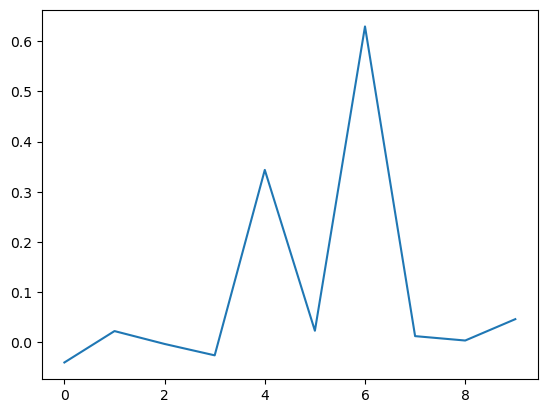

In [192]:
print(layer_2)
plt.plot(layer_2)

The training process may take many minutes, depending on a number of factors, such as the processing power of the machine you are running the experiment on and the number of epochs. To reduce the waiting time, you can change the epoch (iteration) variable from 100 to a lower number, reset the runtime (which will reset the weights), and run the notebook cells again.

After executing the cell above, you can visualize the training and test set errors and accuracy for an instance of this training process.

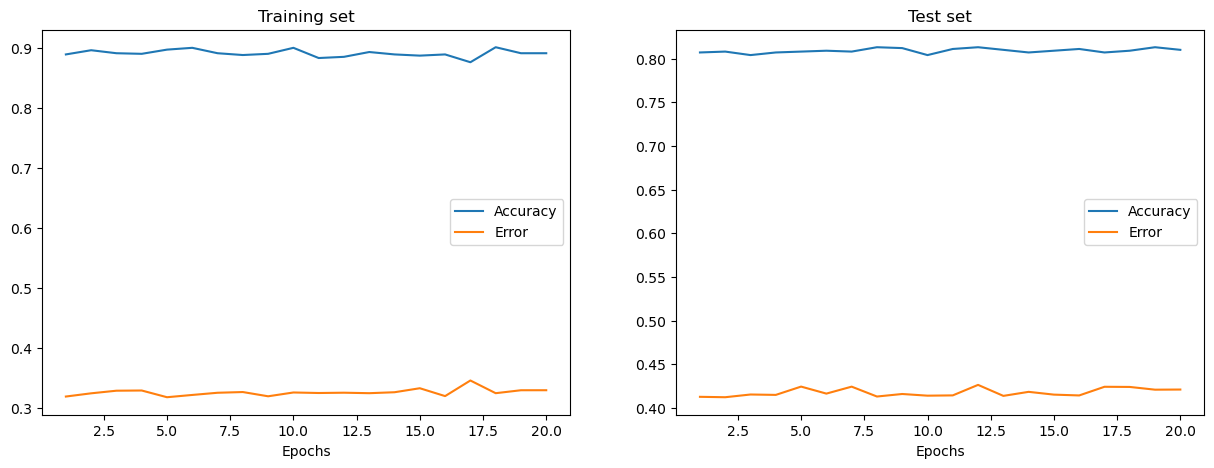

In [292]:
epoch_range = np.arange(epochs) + 1  # Starting from 1

# The training set metrics.
training_metrics = {
    "accuracy": np.asarray(store_training_accurate_pred) / len(training_images),
    "error": np.asarray(store_training_loss) / len(training_images),
}

# The test set metrics.
test_metrics = {
    "accuracy": np.asarray(store_test_accurate_pred) / len(test_images),
    "error": np.asarray(store_test_loss) / len(test_images),
}

# Display the plots.
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
for ax, metrics, title in zip(
    axes, (training_metrics, test_metrics), ("Training set", "Test set")
):
    # Plot the metrics
    for metric, values in metrics.items():
        ax.plot(epoch_range, values, label=metric.capitalize())
    ax.set_title(title)
    ax.set_xlabel("Epochs")
    ax.legend()
plt.show()

_The training and testing error is shown above in the left and right
plots, respectively. As the number of Epochs increases, the total error
decreases and the accuracy increases._

The accuracy rates that your model reaches during training and testing may be somewhat plausible but you may also find the error rates to be quite high.

To reduce the error during training and testing, you can consider changing the simple loss function to, for example, categorical [cross-entropy](https://en.wikipedia.org/wiki/Cross_entropy). Other possible solutions are discussed below.

## Next steps

You have learned how to build and train a simple feed-forward neural network from scratch using just NumPy to classify handwritten MNIST digits.

To further enhance and optimize your neural network model, you can consider one of a mixture of the following:
- Increase the training sample size from 1,000 to a higher number (up to 60,000).
- Use [mini-batches and reduce the learning rate](http://www.cs.toronto.edu/~tijmen/csc321/slides/lecture_slides_lec6.pdf).
- Alter the architecture by introducing more hidden layers to make the network [deeper](https://en.wikipedia.org/wiki/Deep_learning).
- Combine the [cross-entropy](https://en.wikipedia.org/wiki/Cross_entropy) loss function with a [softmax](https://en.wikipedia.org/wiki/Softmax_function) activation function in the last layer.
- Introduce convolutional layers: replace the feedforward network with a [convolutional neural network](https://en.wikipedia.org/wiki/Convolutional_neural_network) architecture.
- Use a higher epoch size to train longer and add more regularization techniques, such as [early stopping](https://en.wikipedia.org/wiki/Early_stopping), to prevent [overfitting](https://en.wikipedia.org/wiki/Overfitting).
- Introduce a [validation set](https://en.wikipedia.org/wiki/Training,_validation,_and_test_sets) for an unbiased valuation of the model fit.
- Apply [batch normalization](https://en.wikipedia.org/wiki/Batch_normalization) for faster and more stable training.
- Tune other parameters, such as the learning rate and hidden layer size.

Building a neural network from scratch with NumPy is a great way to learn more about NumPy and about deep learning. However, for real-world applications you should use specialized frameworks — such as [PyTorch](https://pytorch.org/), [JAX](https://github.com/google/jax), [TensorFlow](https://www.tensorflow.org/guide/tf_numpy) or [MXNet](https://mxnet.apache.org) — that provide NumPy-like APIs, have built-in [automatic differentiation](https://en.wikipedia.org/wiki/Automatic_differentiation) and GPU support, and are designed for high-performance numerical computing and machine learning.

Finally, when developing a machine learning model, you should think about potential ethical issues and apply practices to avoid or mitigate those:
- Document a trained model with a Model Card - see the [Model Cards for Model Reporting paper](https://doi.org/10.1145/3287560.3287596) by Margaret Mitchell et al..
- Document a dataset with a Datasheet - see the [Datasheets for Datasets paper](https://arxiv.org/abs/1803.09010)) by Timnit Gebru et al..
- Consider the impact of your model - who is affected by it, who does it benefit - see [the article](https://www.nature.com/articles/d41586-020-02003-2) and [talk](https://slideslive.com/38923453/the-values-of-machine-learning) by Pratyusha Kalluri.
- For more resources, see [this blog post by Rachel Thomas](https://www.fast.ai/2018/09/24/ai-ethics-resources/) and the [Radical AI podcast](https://www.radicalai.org/).

(Credit to [hsjeong5](https://github.com/hsjeong5/MNIST-for-Numpy) for demonstrating how to download MNIST without the use of external libraries.)